# Square Lattice

In [1]:
using FreeBird
using Plots
using DataFrames
using CSV

In [2]:
"""
    plot_lattice_system!(lattice_system::Lattice2DSystem)


Plot the lattice system with occupied sites.

# Arguments
- `lattice_system::Lattice2DSystem`: The lattice system to plot.
"""

function plot_lattice_system!(lattice_system::AbstractWalkers.Lattice2DSystem)
    site_occupancy = lattice_system.site_occupancy
    dims = lattice_system.dimensions

    function plot_lattice!(offset_x, offset_y, alpha_value)
        for idx in 1:length(site_occupancy)
            if site_occupancy[idx] == 1
                x = (idx - 1) % dims[1] + 0.5 + offset_x
                y = (idx - 1) ÷ dims[1] + 0.5 + offset_y
                scatter!([x], [y], color=:black, markersize=10, shape=:circle, alpha=alpha_value)
            end
        end
    end

    padding = 0.5
    plot(aspect_ratio=:equal, xlim=(-padding, 3 * dims[1] + padding), ylim=(-padding, 3 * dims[2] + padding), 
         framestyle=:grid, legend=false, ticks=:none, grid=false, size=(600, 600))

    for i in 0:3*dims[2]
        hline!([i], color=:gray, linestyle=:dash, linewidth=1, xlims=(0, 3*dims[1]))
    end

    for j in 0:3*dims[1]
        vline!([j], color=:gray, linestyle=:dash, linewidth=1, ylims=(0, 3*dims[2]))
    end

    for dx in -1:2
        for dy in -1:2
            alpha_value = (dx == 1 && dy == 1) ? 1.0 : 0.5
            plot_lattice!(dx * dims[1], dy * dims[2], alpha_value)
        end
    end

    plot!([(dims[1]), (2 * dims[1])], [(dims[2]), (dims[2])], color=:black, linewidth=3)
    plot!([(dims[1]), (2 * dims[1])], [(2 * dims[2]), (2 * dims[2])], color=:black, linewidth=3)
    plot!([(dims[1]), (dims[1])], [(dims[2]), (2 * dims[2])], color=:black, linewidth=3)
    plot!([(2 * dims[1]), (2 * dims[1])], [(dims[2]), (2 * dims[2])], color=:black, linewidth=3)

    display(plot!())
end

plot_lattice_system! (generic function with 1 method)

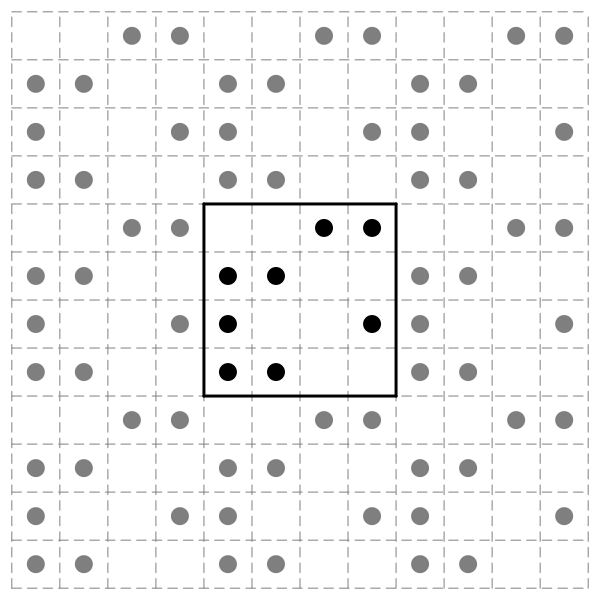

In [3]:
# Plot a 4x4 square lattice with 8 occupied sites
lattice_type = :square
dims = (4, 4)
num_occ_sites = 8
seed = 1234
site_occupancy = AbstractWalkers.Lattice2DSystem(lattice_type, dims, num_occ_sites, seed)
plot_lattice_system!(site_occupancy)

## $4\times4$

### $\theta = 1 / 8$

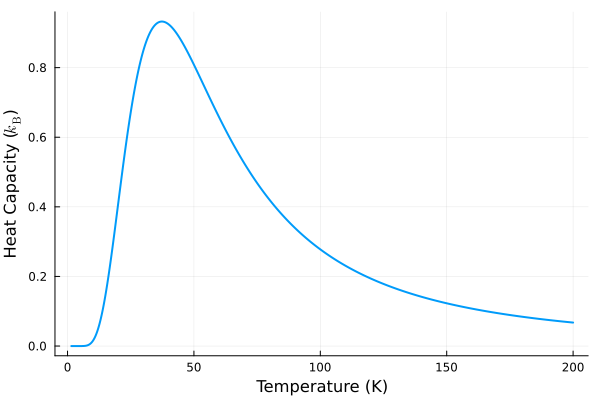

In [4]:
# Define the properties of the lattice system
L = 4
M = 4
coverage = 1 / 8
N = Int(floor(coverage * L * M))
nn_interaction_energy = -0.01u"eV"
adsorption_energy = 4 * nn_interaction_energy
nnn_interaction_energy = nn_interaction_energy / 4

# Define the lattice gas Hamiltonian
lg = LGHamiltonian(adsorption_energy, nn_interaction_energy, nnn_interaction_energy)

# Enumerate all possible configurations of the lattice gas and calculate the energy of each configuration
energies, configurations = AbstractWalkers.exact_enumeration(L, M, N, lattice_type, lg)

# Calculate the constant-volume heat capacity of the lattice gas
Ts = collect(1.0:0.1:200.0)  # K
kB = 8.617333262e-5  # eV/K
βs = 1 ./ (kB * Ts)  # 1/eV
ωis = ones(length(energies))

Eis = zeros(length(energies))
for i in 1:length(energies)
    Eis[i] = ustrip(energies[i])
end

dof = 0

Cv = [cv(β, ωis, Eis, dof) / kB for β in βs]

# Plot the constant-volume heat capacity of the lattice gas
plot(Ts, Cv, xlabel="Temperature (K)", ylabel="Heat Capacity (\$ k_{\\mathrm{B}} \$)", legend=false, linewidth=2, size=(600, 400))

display(plot!())

### $\theta-T$ Phase Diagram

In [5]:
# Define the simulation details
simulation_details = "N$(L*M)_L$(L)_M$(M)"  # e.g., "N16_L4_M4"

# Create empty DataFrames to store the data
df_Cv = DataFrame(N = Int[], L = Int[], M = Int[], β = Float64[], T = Float64[], Cv = Float64[])
df_energies_configs = DataFrame(N = Int[], configuration = String[], energy = Float64[])

# Loop over different numbers of occupied sites
for N in 1:L*M

    # Enumerate all possible configurations of the lattice gas and calculate the energy of each configuration
    energies, configurations = AbstractWalkers.exact_enumeration(L, M, N, lattice_type, lg)

    # Calculate the constant-volume heat capacity of the lattice gas
    Ts = collect(1.0:0.1:200.0)  # K
    βs = 1 ./ (kB * Ts)  # 1/eV
    ωis = ones(length(energies))

    Eis = zeros(length(energies))
    for i in 1:length(energies)
        Eis[i] = ustrip(energies[i])
    end

    dof = 0

    Cv = [cv(β, ωis, Eis, dof) / kB for β in βs]  # kB

    # Append Cv data to the DataFrame
    append!(df_Cv, DataFrame(N = N, L = L, M = M, β = βs, T = Ts, Cv = Cv))

    # Append energies and configurations to the DataFrame
    for i in 1:length(energies)
        append!(df_energies_configs, DataFrame(N = N, configuration = string(configurations[i]), energy = ustrip(energies[i])))
    end
end

# Write the DataFrame to a CSV file with a descriptive name
CSV.write("Cv_data_$simulation_details.csv", df_Cv)
CSV.write("energies_configs_$simulation_details.csv", df_energies_configs)

"energies_configs_N16_L4_M4.csv"

## $6 \times 6$

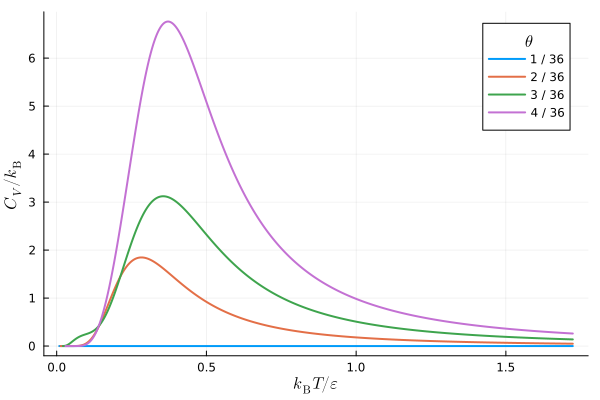

In [6]:
# Define the properties of the lattice system
L = 6
M = 6

plot()

# Loop over different numbers of occupied sites
for N in 1:4

    # Enumerate all possible configurations of the lattice gas and calculate the energy of each configuration
    energies, configurations = AbstractWalkers.exact_enumeration(L, M, N, lattice_type, lg)

    # Calculate the constant-volume heat capacity of the lattice gas
    Ts = collect(1.0:0.1:200.0)  # K
    βs = 1 ./ (kB * Ts)  # 1/eV
    ωis = ones(length(energies))

    Eis = zeros(length(energies))
    for i in 1:length(energies)
        Eis[i] = ustrip(energies[i])
    end

    dof = 0

    Cv = [cv(β, ωis, Eis, dof) / kB for β in βs]  # kB

    # Plot the constant-volume heat capacity of the lattice gas
    Trs = kB * Ts / ustrip(-nn_interaction_energy)
    plot!(Trs, Cv, xlabel="\$ k_{\\mathrm{B}} T / ε \$", ylabel="\$ C_V / k_{\\mathrm{B}} \$", linewidth=2, size=(600, 400), label="$(N) / $(L * M)", legendtitle="\$ \\theta \$")
end

display(plot!())